# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
#%matplotlib inline
#from fastai.basics import *
#import random
import sys
import time
import cv2
import numpy as np
import tensorflow as tf
import os
import zipfile
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Sklearn libraries
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

1.Load Data

In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Q2Assignments/CarPrice_Assignment.csv')

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


2.Check Missing Values

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no NULL/missing values

Data Assessment

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


PREPROCESSING

Determinig relationship among features

In [12]:
le = LabelEncoder() # Instantiated labelencoder 

In [ ]:
labelencoder=LabelEncoder()
df['fueltype']=le.fit_transform(df['fueltype']) #see other works, methods, function calling list convert
df['aspiration']=le.fit_transform(df['aspiration'])
df['carbody']=le.fit_transform(df['carbody'])
df['drivewheel']=le.fit_transform(df['drivewheel'])
df['enginelocation']=le.fit_transform(df['enginelocation'])
df['fuelsystem']=le.fit_transform(df['fuelsystem'])

In [13]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})
df['cylindernumber']=df['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

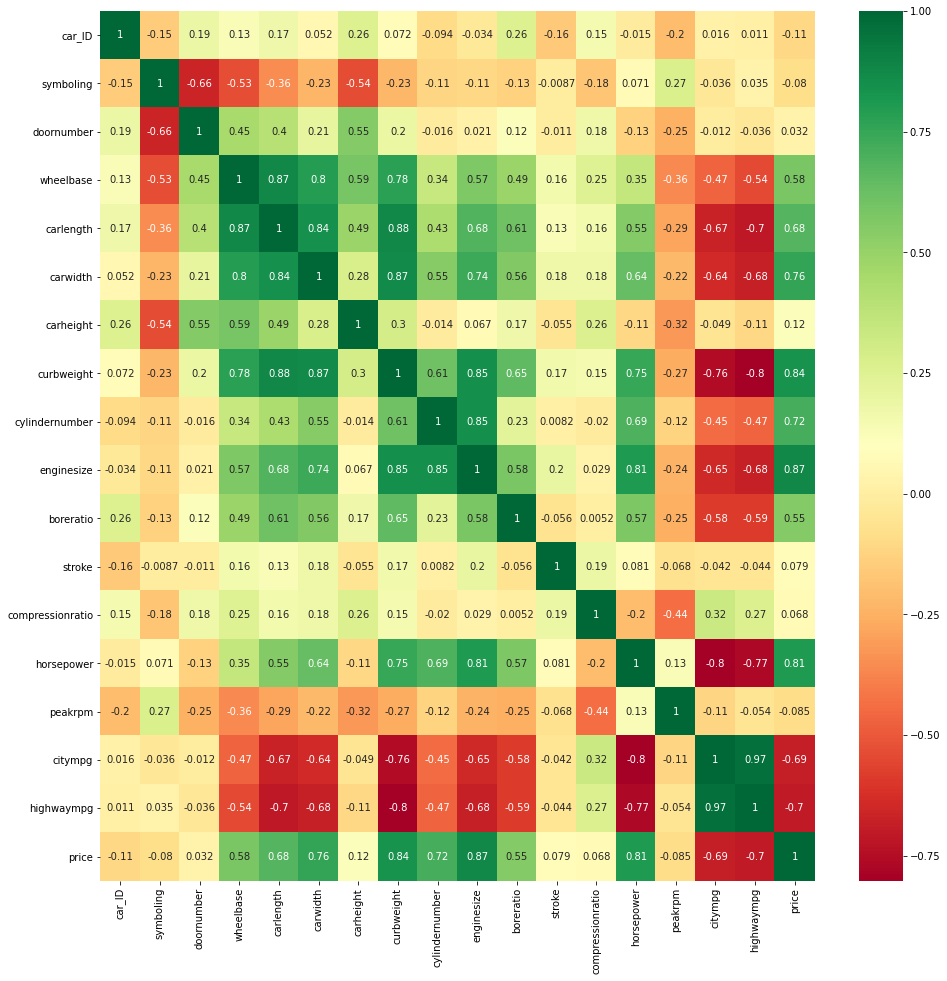

In [14]:
corrmat=df.corr() #feature engineering in ML. dropping in DL auto mostly, drop which has no relationship
top_corr_features=corrmat.index #see independent and dependent variables. multi-co-linearity of independent variables among themselves should not exist
plt.figure(figsize=(16,16))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

filtering features

In [15]:
data1 = df[['drivewheel', 'fuelsystem','enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]
#column with strong relationship with price

In [16]:
print(data1.shape)
data1.head()

(205, 11)


,drivewheel,fuelsystem,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,rwd,mpfi,front,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,rwd,mpfi,front,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,rwd,mpfi,front,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,fwd,mpfi,front,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,4wd,mpfi,front,99.4,176.6,66.4,2824,136,3.19,115,17450.0


3.Splitting

In [17]:
x=(data1.loc[:,data1.columns != 'price'])
y=(data1.loc[:,data1.columns == 'price'])
from sklearn.model_selection import train_test_split #backspace, auto shuffle, default=true
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3, random_state=42) #spacebar, default shuffle
#no shuffle in time series

In [18]:
x_train.head()

,drivewheel,fuelsystem,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
177,fwd,mpfi,front,102.4,175.6,66.5,2458,122,3.31,92
75,rwd,mpfi,front,102.7,178.4,68.0,2910,140,3.78,175
174,fwd,idi,front,102.4,175.6,66.5,2480,110,3.27,73
31,fwd,1bbl,front,86.6,144.6,63.9,1819,92,2.91,76
12,rwd,mpfi,front,101.2,176.8,64.8,2710,164,3.31,121


In [19]:
y_train.head()

,price
177,11248.0
75,16503.0
174,10698.0
31,6855.0
12,20970.0


In [20]:
x_test.head()

,drivewheel,fuelsystem,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
15,rwd,mpfi,front,103.5,189.0,66.9,3230,209,3.62,182
9,4wd,mpfi,front,99.5,178.2,67.9,3053,131,3.13,160
100,fwd,2bbl,front,97.2,173.4,65.2,2302,120,3.33,97
132,fwd,mpfi,front,99.1,186.6,66.5,2658,121,3.54,110
68,rwd,idi,front,110.0,190.9,70.3,3750,183,3.58,123


In [21]:
y_test.head()

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000


In [22]:
x_train.shape

(143, 10)

In [23]:
y_train.shape

(143, 1)

In [24]:
x_test.shape

(62, 10)

In [25]:
y_test.shape

(62, 1)

4.Model and 5.Compilation Step

In [26]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

6,7 and 8.Train, tune and evaluate the Model

In [ ]:
import numpy as np
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_x_train = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_x_train, partial_y_train, epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

[2656.756591796875, 2850.788818359375, 2297.08056640625, 2464.283447265625]

In [ ]:
np.mean(all_scores)

2567.2273559570312

In [ ]:
from keras import backend as K
# Some memory clean-up
K.clear_session()

In [ ]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_x_train = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_x_train, partial_y_train, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

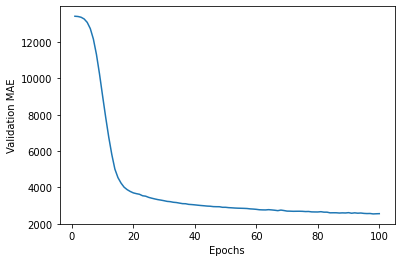

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

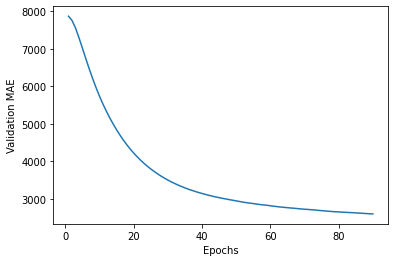

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 30960086.0000 - mae: 4201.6875


In [ ]:
test_mae_score

4201.6875

In [ ]:
y_pred=model.predict(x_test) #load result on kaggle to receive %result